# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [14]:
# import the necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import math

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [181]:
P_A = .7
P_B = .5
P_B_given_A = .4

#P(AandB) = P_B_given_A * P_A 
ans1 = P_B_given_A * P_A
ans2 = P_A+P_B-ans1
ans3 = ans1/P_B
ans4 = (P_B-ans1)/(1-P_A)

answers = [ans1,ans2,ans3,ans4]
for i in range(len(answers)):
    print('Answer '+str(i+1)+' = ', round(answers[i],2))

Answer 1 =  0.28
Answer 2 =  0.92
Answer 3 =  0.56
Answer 4 =  0.73


### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [23]:
#event space: 52 cards
#A = drawing a king or a queen
ans1 = 8/52

#possible 5 cards: permutation of a subset (52,5)
# ans2 = math.factorial(52)/(math.factorial(5)*math.factorial(52-5))
ans2 = math.factorial(52)/math.factorial(52-5)

#events are independent hence P(inter) = products each prob & have to consider the combinations of getting 2R and 3B

ans3 = ((26*25*26*25*24)/(52*51*50*49*48))*(math.factorial(5)/(math.factorial(2)*math.factorial(3)))

answers = [ans1,ans2,ans3]
for i in range(len(answers)):
    print('Answer '+str(i+1)+' = ', round(answers[i],2))

Answer 1 =  0.15
Answer 2 =  311875200.0
Answer 3 =  0.33


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [182]:
def probability_of_scoring_k(n,k,p):
    """
    n = number of draws
    p = probability of winning a point (winning a point with face cards (12 possibilities))
    k = number of points scored
    
    Use np.factorial()
    
    """
    return  (p)**k* (1-p)**(n-k)
    
    

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [50]:
(12/52)**8*(1-12/52)**14

2.0427550226858593e-07

In [183]:
ans2 = probability_of_scoring_k(n=22,k=8,p=12/52)
ans2

2.0427550226858593e-07

3. Plot the probability mass function of $k$ in 22 draws.


In [104]:
points  = list(range(23))
prob_winning = []

for point in points:
#     point = np.random.randint(0,draw+1)
    prob = probability_of_scoring_k(22,point,12/52)
    prob_winning.append(prob)


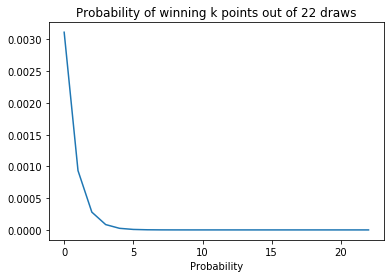

In [185]:
plt.plot(points,prob_winning)
plt.title("Probability of winning k points out of 22 draws")
plt.xlabel('Points')
plt.xlabel('Probability')
plt.show()

4. Plot the cumulative density function of $k$ in 22 draws.

In [180]:
prob_cumulative = [prob_winning[0]]
# prob_cumulative[0]= prob_winning[0]
for i in range(1,23):
    new=prob_cumulative[i-1]+prob_winning[i]
    prob_cumulative.append(new)
#     print(prob_cumulative[i-1],prob_winning[i],prob_cumulative[i])
    
prob_cumulative

[0.003113481211226729,
 0.004047525574594747,
 0.004327738883605153,
 0.0044118028763082745,
 0.004437022074119211,
 0.0044445878334624924,
 0.004446857561265477,
 0.004447538479606372,
 0.004447742755108641,
 0.004447804037759321,
 0.004447822422554526,
 0.004447827937993087,
 0.0044478295926246554,
 0.004447830089014126,
 0.004447830237930967,
 0.00444783028260602,
 0.004447830296008536,
 0.004447830300029291,
 0.004447830301235517,
 0.004447830301597385,
 0.004447830301705946,
 0.004447830301738513,
 0.004447830301748284]

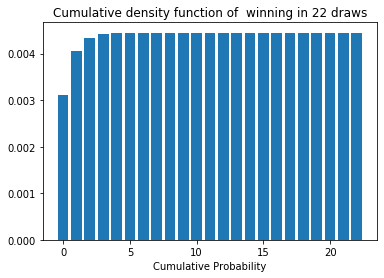

In [192]:
plt.bar(points,prob_cumulative)
plt.title("Cumulative density function of  winning in 22 draws")
plt.xlabel('Points')
plt.xlabel('Cumulative Probability')
plt.show()

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [55]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]
#I transformed my data into numpy array - better for stats calculation
transformed_ratings = np.array(ratings)
transformed_ratings

array([ 1. ,  2. ,  7. ,  7.5,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,
        8. ,  9. ,  9. ,  9. , 10. , 10. , 10. ])

In [196]:
#computing descriptive stats using numpy and scipy built-in methods
mean = np.mean(transformed_ratings)
median = np.median(transformed_ratings)
mode = stats.mode(transformed_ratings)[0][0]
standard_deviation = np.std(transformed_ratings)
number_range = len(transformed_ratings)
interquartile_range = np.percentile(transformed_ratings, [100, 75 ,25,0])
# stats.iqr(transformed_ratings,axis=0)

print(
"Mean: ", round(mean,2), "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", round(standard_deviation,2), "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.69 
Median:  8.0 
Mode:  8.0 
Standard Deviation:  2.35 
Range:  18 
Interquartile Range:  [10.  9.  8.  1.]


2. What measure of centrality would you use to most fairly describe the ratings and why?

In [ ]:
# Your written answer here
"""
Rating assesses the performance of the restaurant as it's coming from different cusrtomers.
In order to describe the ratings of the restaurant, I would use the mode as it shows the most ratings:
The most repetitive choice by the customers.
By using the mode, I show how people like the restaurant (most of them picked 8) and give an idea of the likelihood of having a 
good service there.
"""

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

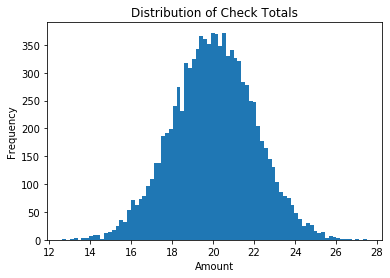

In [82]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [133]:
x_bar = 20
sigma = 2
n=10000
def z_score(check_amt):
    
    """
    check_amt = the amount for which we want to compute the z-score
    
    """
    a = (check_amt-x_bar)/sigma
    return a

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [128]:
# Answer 2
# z_score_23 = z_score(23)
# z_score_23

if stats.norm.sf(abs(z_score(23)))<0.05:
    #reject Ho
    ans2 = True
else:
    ans2 = False

In [129]:
# Answer 3

if stats.norm.sf(abs(z_score(24)))<0.05:
    #reject Ho
    ans3 = True
else:
    ans3 = False

In [130]:
print(' ans2 = ', ans2, "\n", 'ans3 = ', ans3)

 ans2 =  False 
 ans3 =  True


4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [ ]:
"""Confidence interval is a range of values that, given a certain probability, 
I can be statistically certain my population mean is within that range """

In [134]:
# Your written answer here
# I will calculate the 2 numbers of the confidence range
confidence_low = x_bar - 1.96  * (sigma/math.sqrt(n))
confidence_high = x_bar + 1.96  * (sigma/math.sqrt(n))
confidence_interval = [confidence_low,confidence_high]
confidence_interval                                  

[19.9608, 20.0392]

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [137]:
# Your written answer here
print("""
In order to make inferences on the population mean, based on the Central Limnit Theorem:
a) I can use different samples of my population
b) Create a distribution of the means of the samples
c) The distribution of the means will approximate a normal distibution
d) Thus, I will be able to estiamtes my population mean using the normal distribution characteristics. """)


In order to make inferences on the population mean, based on the Central Limnit Theorem:
a) I can use different samples of my population
b) Create a distribution of the means of the samples
c) The distribution of the means will approximate a normal distibution
d) Thus, I will be able to estiamtes my population mean using the normal distribution characteristics. 


## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ `There is no difference in the spending of the customers --> Xq = 20`

$H_{A}:$ `The average spending of the Queso customers is different than the population --> Xq<>20`

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [147]:
# Your written answer here
print("""  Type I error: The owner of the restaurant rejects the fact that there is a no difference in the spending of the Queso customers while it is true (The new customer spends the same average amount of $20). 
For e.g, he can produce more and more Queso as he is assuming there are spending more which is not true.

  Type II error: Ho is false --> The Queso customers spend more or less than the average, however, the 
owner of the restaurant assumes the opposite (he accepts the hypothesis that Xq = 20)
For e.g, he can omit to give them a better service while they are spending more and lose them as he assumed they were spending the same.""")


  Type I error: The owner of the restaurant rejects the fact that there is a no difference in the spending of the Queso customers while it is true (The new customer spends the same average amount of $20). 
For e.g, he can produce more and more Queso as he is assuming there are spending more which is not true.

  Type II error: Ho is false --> The Queso customers spend more or less than the average, however, the 
owner of the restaurant assumes the opposite (he accepts the hypothesis that Xq = 20)
For e.g, he can omit to give them a better service while they are spending more and lose them as he assumed they were spending the same.


### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

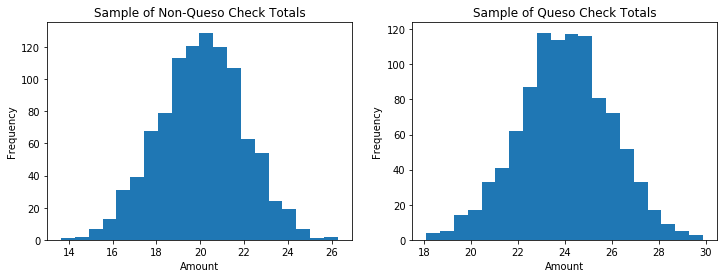

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [197]:
#perform a Student t-test comparing the mean of 2 groups
result_test = stats.ttest_ind(queso,no_queso,equal_var=True)

if result_test[1]<0.05:
    print('We reject the null hypothesis of equal averages of spending of Queso and Non-Queso customers.')
else:
    print('We fail to reject the null hypothesis of equal averages of spending of Queso and Non-Queso customers.')


We reject the null hypothesis of equal averages of spending of Queso and Non-Queso customers.


2. What are the conditions required to perform the test you chose?

In [160]:
# Your written answer here
""" I performed a Student t-test (unpaired). The conditions:
    1- I don't have reliable data on the population, hence, I don't know its distribution and parameters
    2- The variances of the 2 populations are equal
    3- Queso and non-queso customers are independant
    3- Based on the graphs, the sample size is less than 30 """
    

" I performed a Student t-test (unpaired). The conditions:\n    1- I don't have reliable data on the population, hence, I don't know its distribution and parameters\n    2- The variances of the 2 populations are equal\n    3- Queso and non-queso customers are independant\n    3- Based on the graphs, the sample size is less than 30 "

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [198]:
p_petstore_given_small = (p_small_given_petstore*p_petstore)/(p_small_given_petstore*p_petstore+ p_small_given_pound*p_pound)
p_petstore_given_small

p_pound_given_small = round((p_small_given_pound*p_pound)/(p_small_given_pound*p_pound + p_small_given_petstore*p_petstore),2)
p_petstore_given_small,p_pound_given_small

(0.6, 0.4)

In [199]:
p_petstore = .2
p_pound = .8

p_small_given_petstore = .6
p_medium_given_petstore = .3
p_large_given_petstore = .1

p_small_given_pound = .1
p_medium_given_pound = .35
p_large_given_pound = .55



ans1 = p_petstore*p_small_given_petstore + p_pound*p_small_given_pound
ans2 = (p_large_given_petstore*p_petstore)/(p_large_given_petstore*p_petstore+p_large_given_pound*p_pound)
ans2=round(ans2,3)
# for ans3 compare p_petstore_given_small vs. p_pound_given_small
if p_petstore_given_small > p_pound_given_small:
    ans3 = "Given that Thomas got a small puppy, it is more likely that he went to the pet store"
else:
    ans3 = "Given that Thomas got a small puppy, it is more likely that he went to the pound"
ans3
ans4_prior = "prior: Probability going to the store"
ans4_posterior = "posterior: Probability of large puppy"
ans4_likelihood = "likelihood: probability large given going to the store"

answers = [ans1,ans2,ans3,ans4_prior,ans4_posterior,ans4_likelihood]
for i in range(len(answers)):
    print('Answer '+str(i+1)+' = ', answers[i])



Answer 1 =  0.2
Answer 2 =  0.043
Answer 3 =  Given that Thomas got a small puppy, it is more likely that he went to the pet store
Answer 4 =  prior: Probability going to the store
Answer 5 =  posterior: Probability of large puppy
Answer 6 =  likelihood: probability large given going to the store
